# Exercise 3.3

First of all, we import usefull libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

Now, we import data we want to work with.

In [2]:
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We're fitting our variables to a linear funtion as: $y = ax + b$

Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

We extend our 'x' values.

In [3]:
x = np.append(iris_df['sepal width (cm)'].values, iris_df['sepal length (cm)'].values)
x = np.resize(x, [2, 150])

y = iris_df['petal length (cm)'].values

dataset_size = np.size(y)

mean_x, mean_y = [np.mean(x[0]), np.mean(x[1])], np.mean(y)

After that, we can implement the Fisher's classifier calculating the mean values and expanding ir for two dimensions in $X$ axis.

In [4]:
SS_xy = [np.sum(np.dot(y, x[0])) - dataset_size * mean_y * mean_x[0],
         np.sum(np.dot(y, x[1])) - dataset_size * mean_y * mean_x[1]]

SS_xx = [np.sum(np.dot(x[0], x[0])) - dataset_size * mean_x[0]**2,
         np.sum(np.dot(x[1], x[1])) - dataset_size * mean_x[1]**2]

a = [SS_xy[0] / SS_xx[0], SS_xy[1] / SS_xx[1]]
b = mean_y - np.dot(a, mean_x)

def _y_pred_(x, y):
    return a[0] * x + a[1] * y + b

Now, we proceed to plot our results, so we see predicted image of our intial $'x'$ points, so we can see they are well separated into two groups.

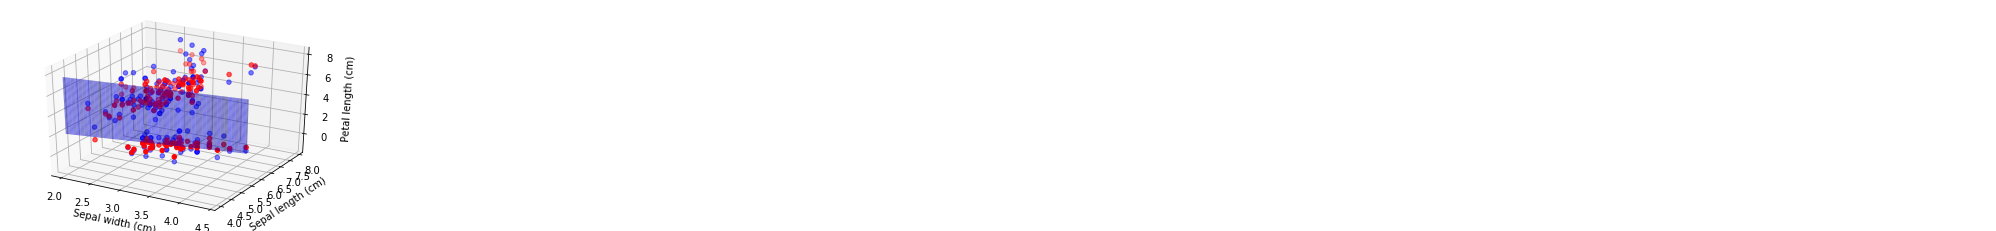

In [5]:
L = 100
x_graph = np.linspace(int(min(x[0])), int(max(x[0])), L)
y_graph = np.linspace(int(min(x[1])), int(max(x[1])), L)
X, Y = np.meshgrid(x_graph, y_graph)

y_pred_1 = np.zeros([L, L]) # We make a plain
y_pred_2 = np.zeros(len(x[0])) # We obtain images of our points

for i in range(L):
    for j in range(L):
        y_pred_1[i, j] = _y_pred_(X[i, j], Y[i, j])

for i in range(len(x[0])):
    y_pred_2[i] = _y_pred_(x[0][i], x[1][i])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[0], x[1], y, c = 'r')
ax.scatter(x[0], x[1], y_pred_2, c = 'b', alpha = 0.5)
ax.plot_surface(x_graph, y_graph, y_pred_1, color = 'b', alpha = 0.5) # It's less visible

ax.set_xlabel(u'Sepal width (cm)')
ax.set_ylabel(u'Sepal length (cm)')
ax.set_zlabel(u'Petal length (cm)')
plt.savefig('3D', dpi = 350)
plt.show()